### 선형모델
   - 입력특성(데이터, 문제)을 설명할 수 있는 선형함수를 구하는 것
   - 선형함수 기본식
        문제가 1개일 때: y=

### 선형회귀 이해하기
   - 성적데이터를 기반으로 선형회귀를 이해해보자
   

In [2]:
# 성적 데이터 생성을 위한 라이브러리 꺼내오기
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# 성적 데이터 생성
data=pd.DataFrame([[2, 20], [4, 40], [8, 80], [9, 90]],
             index=['준영','종화','경민','승훈'],
             columns=['시간','성적'])
data

,시간,성적
준영,2,20
종화,4,40
경민,8,80
승훈,9,90


### MSE가 최소가 되는 최적의 w, b를 찾는 방법
- MSE : 평균제곱오차(Mean Squared Error --> 비용함수(cost)
- 1. 수학 공식을 이용한 해석적 모델
- 2. 경사하강법(XGBoost에서 오차 계산하는 방법

#### 수학 공식을 이용한 해석적 모델
- LinearRegression
- 공식을 이용해서 적은 계산으로 한번에 최적의 선형함수를 찾는 방법
- 공식이 완벽하지 않을 경우 잘 못 찾을 수도 있고
- 공식이 잘못되었을 경우 고칠 수 없다는 문제가 있음 ==> 추후 규제를 접목해서 개선할 수 있다

In [17]:
from sklearn.linear_model import LinearRegression

# 모델 생성 및 하이퍼파라미터 설정
linear_model = LinearRegression()

#학습
linear_model.fit(data[['시간']], data['성적']) # 문제는 2차원, 정답은 1차원

LinearRegression()

#### y = wx + b(1개의 문제)

In [18]:
# 기울기, 가중치 출력
print('기울기, 가중치 : ', linear_model.coef_)
# 절편, 편향 출력
print('절편, 편향 : ', linear_model.intercept_)

기울기, 가중치 :  [10.]
절편, 편향 :  7.105427357601002e-15


In [19]:
# 영재씨가 7시간 공부했을 때 몇 점? -예측
linear_model.predict([[7]])

C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.])

### H(x)
   - 가설함수

In [20]:
# 함수 정의
def h(w, x) :
    return w* x + 0

### 비용함수(Cost Function)
   - 비용 = 오차

In [24]:
# 비용함수 정의
# data : 문제 값
# target : 정답(실제 값)
# weight : 가중치

def cost(data, target, weight) :
    # 예측
    y_pre = h(weight, data)
    # 평균제곱오차 = ((예측값 - 실제값) ** 2).mean()
    error = ((y_pre - target) ** 2).mean()
    return error

In [25]:
# 가중치에 따른 오차값 확인
cost(data['시간'], data['성적'], 8)

165.0

In [26]:
cost(data['시간'], data['성적'], 7)

371.25

In [27]:
cost(data['시간'], data['성적'], 10)

0.0

In [29]:
# 가중치 변화에 따른 비용함수의 변화를 그래프로 확인
cost_list = []

for w in range(5, 16) :  # 5 ~ 15까지 가중치 변화
    err = cost(data['시간'], data['성적'], w)
    cost_list.append(err)
cost_list

[1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25]

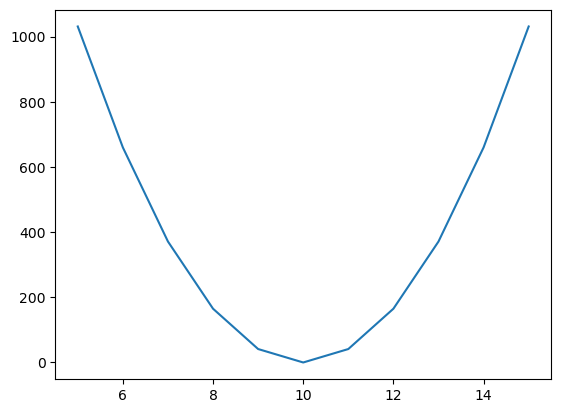

In [30]:
# 비용함수(MSE) 그래프 그리기
plt.plot(range(5, 16), cost_list)
plt.show()

In [31]:
linear_model.score(data[['시간']], data['성적'])
# 분류모델 : score - 정확도
# 회귀모델 : score(MSE를 기반으로 한 R2score) - 유사도

1.0

#### 경사하강법
   - SGDRegressor
   - 점진적으로 오차가 작은 선형함수를 찾아가는 방법

In [39]:
from sklearn.linear_model import SGDRegressor

# 모델생성 및 하이퍼 파라미터 설정
sgd_model = SGDRegressor(max_iter=5000,  # 가중치 업데이트 반복 횟수
                         eta0 = 0.001,   # 학습률(learning rate)
                         verbose = 1)

# 학습
sgd_model.fit(data[['시간']], data['성적'])

-- Epoch 1
Norm: 1.19, NNZs: 1, Bias: 0.172587, T: 4, Avg. loss: 1902.064818
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.04, NNZs: 1, Bias: 0.293865, T: 8, Avg. loss: 1496.003802
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.73, NNZs: 1, Bias: 0.391502, T: 12, Avg. loss: 1222.558443
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.32, NNZs: 1, Bias: 0.473857, T: 16, Avg. loss: 1018.584795
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.83, NNZs: 1, Bias: 0.545088, T: 20, Avg. loss: 859.401225
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.28, NNZs: 1, Bias: 0.607697, T: 24, Avg. loss: 731.789642
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.67, NNZs: 1, Bias: 0.663352, T: 28, Avg. loss: 627.600367
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.03, NNZs: 1, Bias: 0.713248, T: 32, Avg. loss: 541.380743
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.35, NNZs: 1, Bias: 0.758277, T: 36, Avg. loss: 469.281461
Total training time: 0.00

SGDRegressor(eta0=0.001, max_iter=5000, verbose=1)

In [40]:
# 예측
sgd_model.predict([[7]])

C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([69.88641712])

In [41]:
# 가중치(w), 편향(b) 확인하기
print(sgd_model.coef_)
print(sgd_model.intercept_)

[9.79124314]
[1.34771511]


In [42]:
sgd_model.score(data[['시간']], data['성적'])
# 1에 가까울수록 모델이 예측한 성능이 높다고 판단

0.9995376825028434